In [179]:
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as py

| Feature                             | Description                                                |
|-------------------------------------|------------------------------------------------------------|
| BALANCE                             | Balance amount left in the account to make purchases       |
| BALANCE_FREQUENCY                   | How frequently the balance is updated (score between 0 and 1; 1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                           | Amount of purchases made from the account                  |
| ONEOFF_PURCHASES                    | Maximum purchase amount done in one-go                     |
| INSTALLMENTS_PURCHASES              | Amount of purchases done in installments                   |
| CASH_ADVANCE                        | Cash in advance given by the user                          |
| PURCHASES_FREQUENCY                 | How frequently purchases are being made (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY          | How frequently purchases are happening in one-go (score between 0 and 1; 1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASES_INSTALLMENTS_FREQUENCY    | How frequently purchases in installments are being done (score between 0 and 1; 1 = frequently done, 0 = not frequently done) |
| CASH_ADVANCE_FREQUENCY              | How frequently the cash in advance is being paid           |
| CASH_ADVANCE_TRX                    | Number of transactions made with "Cash in Advance"         |
| PURCHASES_TRX                       | Number of purchase transactions made                        |
| CREDIT_LIMIT                        | Limit of credit card for the user                          |
| PAYMENTS                            | Amount of payment done by the user                         |
| MINIMUM_PAYMENTS                    | Minimum amount of payments made by the user                |
| PRC_FULL_PAYMENT                    | Percent of full payment paid by the user                   |
| TENURE                              | Tenure of credit card service for the user                 |


In [180]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)


In [181]:
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

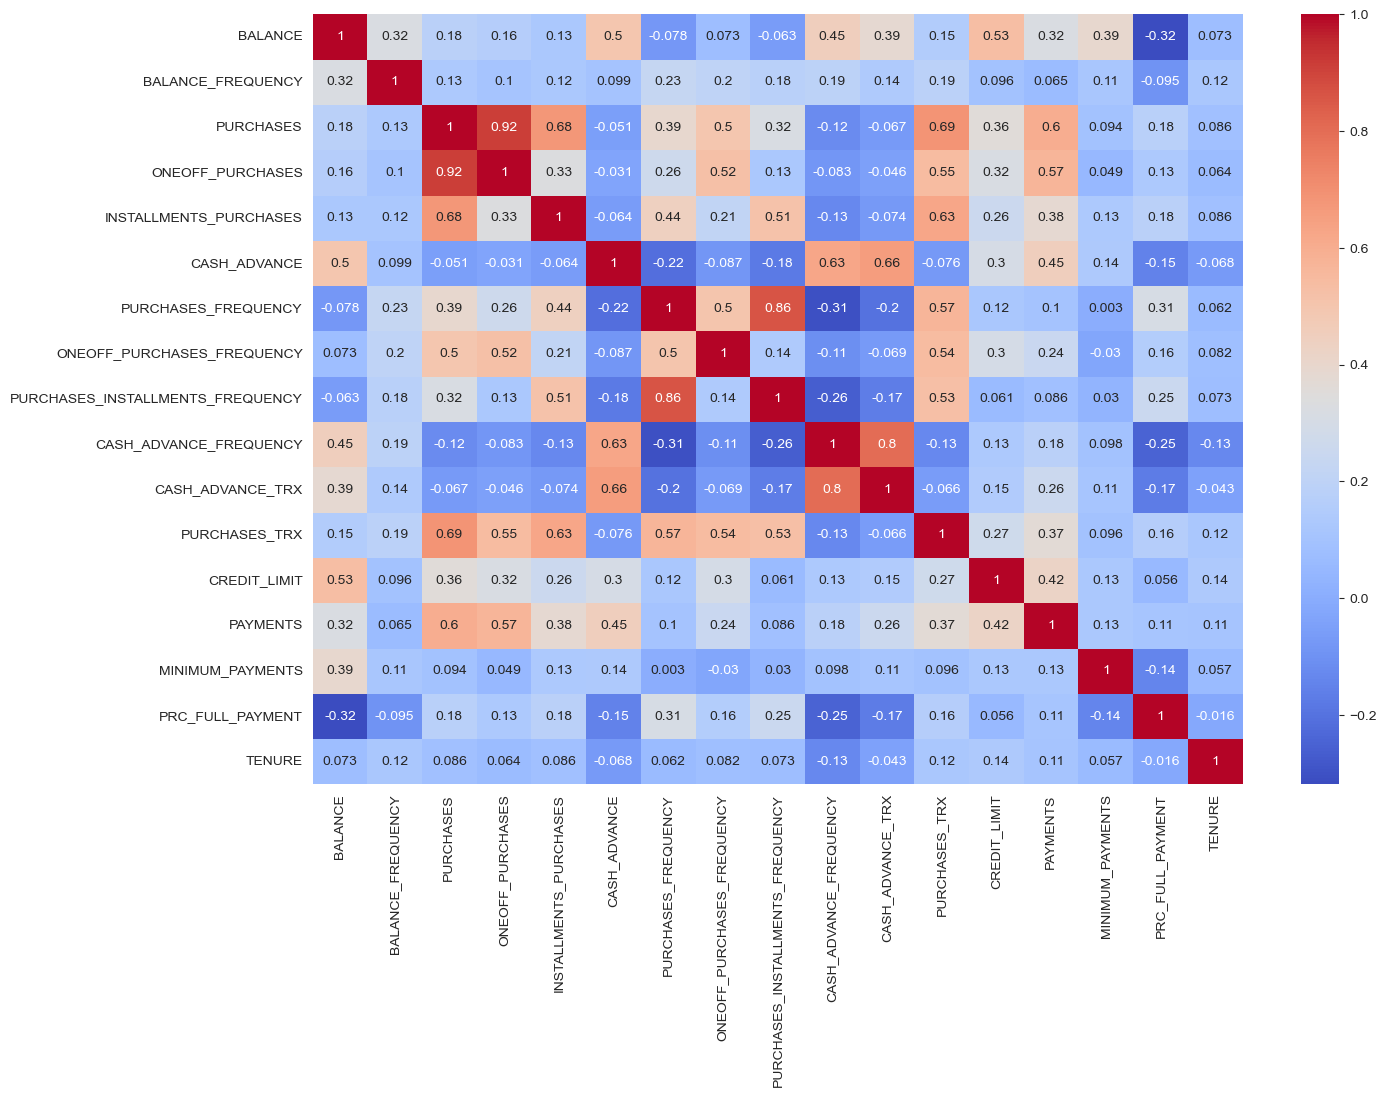

In [182]:
#Correlation matrix to check for multicollinearity not mirrored
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



## 2. Regression Analysis
 


In [183]:
#plot the features against each others with color orange
#sns.pairplot(data, plot_kws={})
#plt.show()


#### A.Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.


(8950, 1)
(8950,)


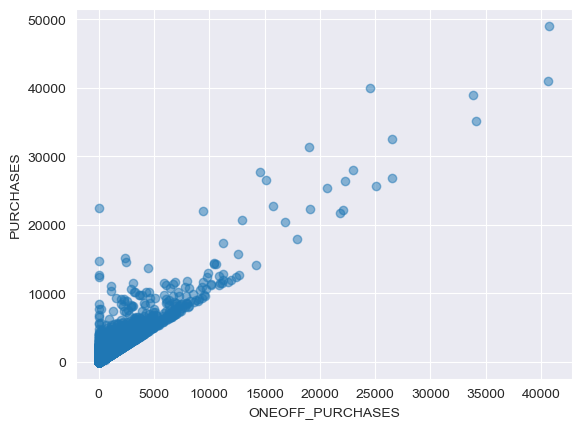

In [184]:

# Features to be analyzed
data = np.array(data)
X = data[:,3:4] # On off purchases
y = data[:,2] # total purchases

print(X.shape)
print(y.shape)

ax = sns.regplot(x=X, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ONEOFF_PURCHASES', 
       ylabel='PURCHASES',);



### B. Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized  residuals  from  this  regression.  Does  the  normal  probability  plot  indicate  acceptable normality, or is there any skewness? If a skewness, what is the type of it?

Estimated coefficient: 1.2381684675081208


/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_3696/537217238.py:5: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_3696/537217238.py:12: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



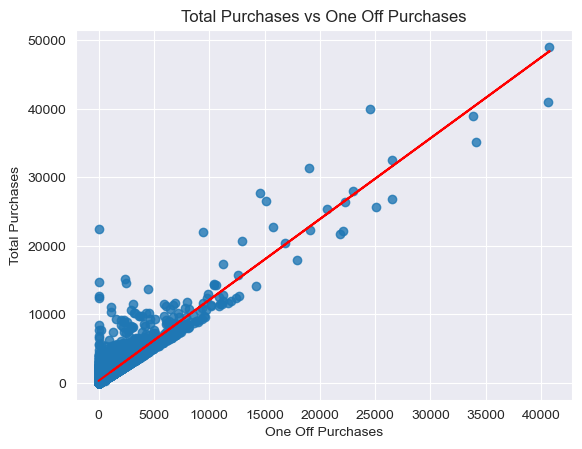

In [185]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

beta = np.linalg.lstsq(X, y)[0]
print('Estimated coefficient:', beta[0])

# Add a column of ones to the feature matrix
ones_vector = np.ones(X.shape[0])
X = np.c_[ones_vector, X]

beta = np.linalg.lstsq(X, y)[0]
beta = np.reshape(beta,(-1,1))

predictions = np.dot(X, beta)

# Plot the data along with the regression line
filtered_X = X[:,1] # Remove the column of ones added earlier

ax = sns.regplot(x=filtered_X, y=y, fit_reg=False)
ax.set(xlabel='One Off Purchases', ylabel='Total Purchases', title='Total Purchases vs One Off Purchases')
plt.plot(filtered_X, predictions, color='red')
plt.show()



In [186]:

mask = y != 0
X_masked = X[mask]
y_masked = y[mask]
print(X[:5])
print(X_masked.shape)
print(y_masked.shape)

[[1.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00]
 [1.0000e+00 7.7317e+02]
 [1.0000e+00 1.4990e+03]
 [1.0000e+00 1.6000e+01]]
(6906, 2)
(6906,)


Text(0.5, 1.0, 'Q-Q plot')

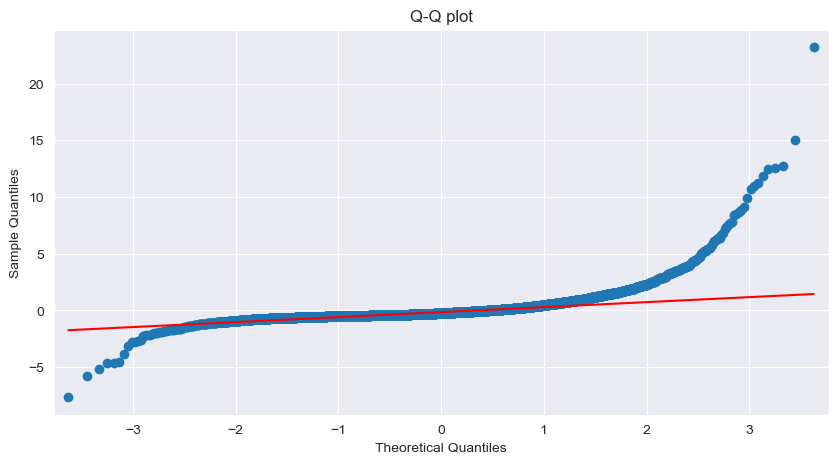

In [187]:
# Normal probability plot of the standardized  residuals  (QQ plot)
import statsmodels.api as sm
import scipy.stats as stats

fig, axs = plt.subplots(ncols=1, # Set the number of columns to split the figure in
                        figsize=(10, 5)) # size of the whole figure

predictions_masked = np.dot(X_masked, beta)
residuals = y_masked - predictions_masked[:,0]
degrees_of_freedom = len(X_masked) - X.shape[1]
standardized_residuals = (residuals - np.mean(residuals) )/ np.std(residuals)

sm.qqplot(standardized_residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs)
axs.set_title(label = 'Q-Q plot')



# Falta retirar conclusao da skewness e isso  (do grafico de cima)


### C. Take  the  natural  log  of  both  of  the  variables  and  perform  a  linear  regression  on  the  transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

In [188]:
mask = y != 0

X_masked = X[mask] ##It has values = 0, so we need to feature engineer it
y_masked = y[mask]
y_masked = np.log(y_masked)

print(X_masked[:5])







[[1.0000e+00 0.0000e+00]
 [1.0000e+00 7.7317e+02]
 [1.0000e+00 1.4990e+03]
 [1.0000e+00 1.6000e+01]
 [1.0000e+00 0.0000e+00]]


Estimated coefficients: [6.03807830e+00 3.95307318e-04]


/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_3696/357295843.py:1: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



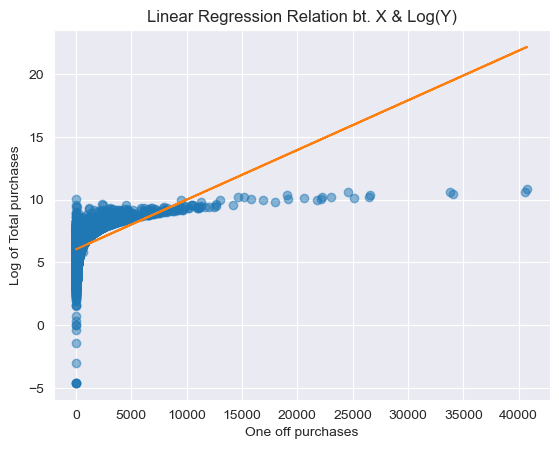

In [189]:
beta = np.linalg.lstsq(X_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

predictions = dot(X_masked,beta) 

#set a limit to the y axis of 10000


ax = sns.regplot(x=X_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='One off purchases',
       ylabel='Log of Total purchases',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(X_masked[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()


Text(0.5, 1.0, 'Q-Q plot')

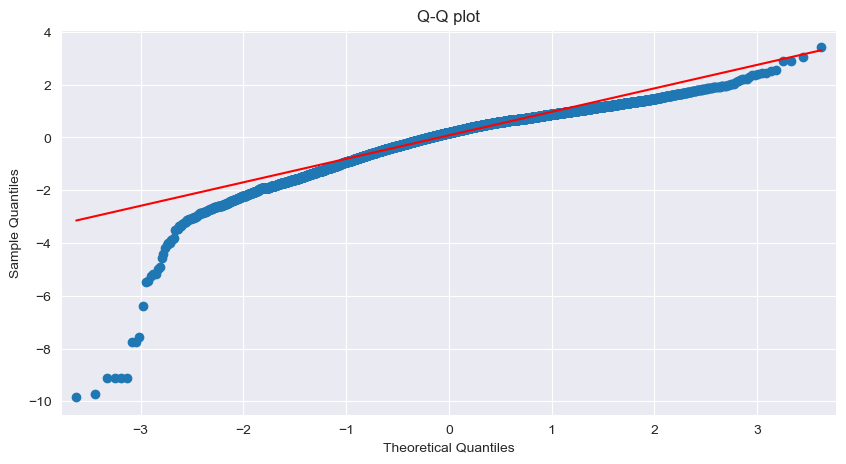

In [190]:
# Normal probability plot of the standardized  residuals  (QQ plot)
import statsmodels.api as sm
import scipy.stats as stats

fig, axs = plt.subplots(ncols=1, # Set the number of columns to split the figure in
                        figsize=(10, 5)) # size of the whole figure

predictions_log = np.dot(X_masked, beta)
residuals_log = y_masked - predictions_log[:,0]
degrees_of_freedom_log= len(X_masked) - X.shape[1]
standardized_residuals_log = (residuals_log - np.mean(residuals_log) )/ np.std(residuals_log)

sm.qqplot(standardized_residuals_log, 
          stats.t,
          distargs=(degrees_of_freedom_log,), 
          line='q', 
          ax=axs)
axs.set_title(label = 'Q-Q plot')



### D. Write the population regression equation for your model. Interpret the meaning of the values of the parameters B0 and B1.

In [191]:
# Y = B0 + B1*X -> Population equation model
# Y - Dependent variable, X - Independent variable
# B0 - Intercept, B1 - Slope
#In order to calculate the B0 and B1:
#X = data[['ONEOFF_PURCHASES']]
#y = data['PURCHASES']

from statsmodels.formula.api import ols

mask = y != 0
X_masked= X[mask]
y_masked= y[mask]

model = sm.OLS(y_masked, X_masked).fit()
#print(model.summary())
B0 = np.round(model.params[0],2)
B1 = np.round(model.params[1],2)

print('The population regression equation is: Y = {} + {}*X'.format(B0, B1))



The population regression equation is: Y = 409.45 + 1.16*X


### E.   Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.

In [192]:
#Coefficient of determination - R-squared
beta = np.linalg.lstsq(X_masked, y_masked)[0]
beta = np.reshape(beta,(-1,1))
predictions = dot(X_masked,beta)
SST = np.sum((y_masked - np.mean(y_masked))**2)
SSR = np.sum((predictions - np.mean(y_masked))**2)
R_squared = SSR/SST
print('The coefficient of determination is:', np.round(R_squared, 2),' which translates into a score between the good and very good range.')



The coefficient of determination is: 0.84  which translates into a score between the good and very good range.


/var/folders/j0/qcl7z3md5p3_yyvf4v0567qm0000gn/T/ipykernel_3696/3347414883.py:2: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



In [193]:
#Coefficient of correlation - Pearson's correlation coefficient
from scipy.stats import pearsonr
population_correlation, _ = pearsonr(X_masked[:,1],y_masked)
print('The coefficient of correlation is:', np.round(population_correlation, 2),' which indicates that the variables are positively correlated.')

The coefficient of correlation is: 0.91  which indicates that the variables are positively correlated.


### F. Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.

In [194]:
residuals = y_masked - predictions[:,0]


In [195]:
model = sm.OLS(y_masked, X_masked).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 3.523e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:16:08   Log-Likelihood:                -57164.
No. Observations:                6906   AIC:                         1.143e+05
Df Residuals:                    6904   BIC:                         1.143e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        409.4463     12.400     33.020      0.0

In [196]:
expected_value = 0.0

for i in range(len(beta)):    
    ttest = (beta[i] - expected_value) / coeff_stde[i]

    #Degrees of freedom
    df = X_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))

Test statistc for coefficient estimate  0 : [33.01969915] | P-value: [0.]
Test statistc for coefficient estimate  1 : [187.69464393] | P-value: [0.]


In [197]:
print('Correlation:',np.corrcoef(y_masked,X_masked[:,1])[0,1])



Correlation: 0.9144063815407268


### G. Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.

In [198]:
B1 = np.round(model.params[1],2)
sB1 = np.round(model.bse[1],3)
df = (X_masked.shape[0]-X_masked.shape[1])

#T-critical value for 95% confidence
t_critical_values = stats.t.ppf([.025,.975], df)
conf_int = B1 + (t_critical_values*sB1)
print('Confidence interval for unknown true slope of the line is:', conf_int)



Confidence interval for unknown true slope of the line is: [1.14823815 1.17176185]


### H. Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.

In [199]:
population_correlation
t_critical_values = stats.t.ppf([.025,.975], df)
root_part = (1-population_correlation**2)/(len(X_masked[:,1])-2)
conf_int = population_correlation + (t_critical_values*np.sqrt(root_part))
print('Confidence interval for population correlation coefficient is:', conf_int)



Confidence interval for population correlation coefficient is: [0.9048562  0.92395656]


### I.Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful. 

In [200]:
#Confidence Interval for Mean Value of y given x

fixed_X = 10000

y_fixed = model.params[0] + model.params[1]*fixed_X

rss = np.sum(residuals**2)
s = np.sqrt(rss / df)
t_critical_values = stats.t.ppf([.025,.975], df)
root_part = (1/len(X_masked)) + ((fixed_X - np.mean(X_masked[:,1]))**2) / (np.sum((X_masked[:,1] - np.mean(X_masked[:,1]))**2))
std_err = s * np.sqrt(root_part)

conf_int = y_mean + t_critical_values * std_err
print('Confidence interval for mean value of y given x:', conf_int)






Confidence interval for mean value of y given x: [11896.04110149 12124.21872495]


### J. Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed  value  of  your  choice  of  the  other  variable.  Interpret  your  result  and  indicate  if  the  prediction interval is useful. 

In [201]:
#Confidence Interval for Mean Value of y given x

fixed_X = 10000

y_fixed = model.params[0] + model.params[1]*fixed_X

t_critical_values = stats.t.ppf([.025,.975], df)
root_part = 1 + root_part
std_err = s * np.sqrt(root_part)

conf_int = y_mean + t_critical_values * std_err
print('Confidence interval for a randomly chosen value of y given x:', conf_int)






Confidence interval for a randomly chosen value of y given x: [10140.37170801 13879.88811844]
